In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_graph_with_nx(G):
    pos = nx.spring_layout(G, k=1000, iterations=200)  #k is for spacing between nodes
    options = {'node_color':'pink', 'alpha':1, 'node_size':2500, 'width':0.2, 'font_color':'darkred', 
               'font_size':12, 'arrows':True, 'edge_color':'brown', 
               'arrowstyle':'Fancy, head_length=1, head_width=1, tail_width=.4'
              }
    weight_labels = nx.get_edge_attributes(G, 'weight')
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels, **options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weight_labels, font_size=10)
    plt.show()

In [16]:
class WeightedDiGraph:
    def __init__(self):
        self.g = {}
        
    def add_node(self, node):
        if node in self.g:
            raise ValueError("Node already in graph")
            
        self.g[node] = []
        
    def add_edge(self, src, dest, cost):
            if src not in self.g:
                raise ValueError("Source node not in graph")
                
            if dest not in self.g:
                raise ValueError("Destination node not in graph")
                
            src_edges = self.g[src]
            if dest in src_edges:
                return
                
            src_edges.append( (dest, cost) )
            
    def traverse_graph(self, start):
        q = [start]
        visited = []
        
        while q:
            current = q.pop(0)
            
            if current in visited:
                continue
                
            print(current)
            
            visited.append(current)
            
            next_nodes = self.g[current]
            
            for n in next_nodes:
                q.append(n[0])
                
    
    def uniform_cost_search(self, src, goal):
        priority_queue = [(0, src)]
        visited = []
        
        while len(priority_queue) != 0:
            path_cost, current = priority_queue.pop(0)
            print(path_cost, current)
            
            if current == goal:
                return True
            
            for neighbor in self.g[current]:
                if neighbor[0] not in visited:
                    visited.append(neighbor[0])
                    
                    cost_till_neighbor = path_cost + neighbor[1]
                    priority_queue.append((cost_till_neighbor, neighbor[0]))
                    
            priority_queue = sorted(priority_queue, key=lambda node: node[0])
            
        return False

    
    # Probably wrong not tested
    def uniform_cost_search_min_3(self, src, goal):
        priority_queue = [(0, src)]
        visited = []
        min_list = []
        
        while len(priority_queue) != 0:
            path_cost, current = priority_queue.pop(0)
            print(path_cost, current)
            
            if current == goal:
                min_list.append(path_cost)
#                 return True
            
            for neighbor in self.g[current]:
                if neighbor[0] not in visited:
                    visited.append(neighbor[0])
                    
                    cost_till_neighbor = path_cost + neighbor[1]
                    priority_queue.append((cost_till_neighbor, neighbor[0]))
                    
            priority_queue = sorted(priority_queue, key=lambda node: node[0])
            
        return min_list
    
    
                    
    def draw_graph(self):
        G = nx.DiGraph()
        for src in self.g:
            G.add_node(src, label=src)
            for dest in self.g[src]:
                G.add_edge(src, dest[0], weight=str(dest[1]))
        
        draw_graph_with_nx(G)    

In [17]:
g = WeightedDiGraph()

nodes = [ 'S', 
          'A',
          'B',
          'C', 
          'D', 
          'E', 
          'F', 
          'G', 
          'H',
          'I',
          'J',
          'K',  ]
for n in nodes:
    g.add_node(n)
    
edges_1 = [
    ('S', 'A', 140),  #(source, destination, time, distance)
    ('A', 'B', 360),
    ('B', 'C', 130),
    ('B', 'D', 200),
    ('C', 'E', 260),
    ('D', 'E', 200),
    ('E', 'F', 400),
    ('F', 'G', 290),
    ('G', 'H', 160),
    ('A', 'I', 240),
    ('I', 'J', 660),
    ('J', 'F', 320),
    ('A', 'K', 290),
    ('K', 'E', 320),
    ('S', 'B', 230),
    ('S', 'C', 260)
]
for e in edges_1:
    g.add_edge(e[0], e[1], e[2])    

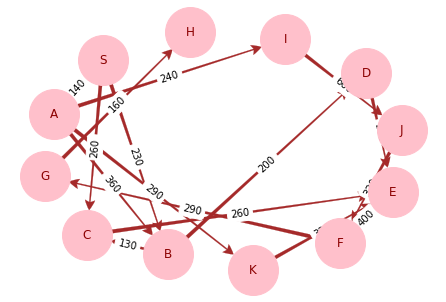

In [18]:
g.draw_graph()

In [19]:
g.uniform_cost_search('S', 'H')

0 S
140 A
230 B
260 C
380 I
430 K
430 D
520 E
920 F
1040 J
1210 G
1370 H


True

In [20]:
g.uniform_cost_search_min_3('S', 'H')

0 S
140 A
230 B
260 C
380 I
430 K
430 D
520 E
920 F
1040 J
1210 G
1370 H


[1370]